In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('fake-news/train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# Independent Features

X=df.drop('label',axis=1)

In [6]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [7]:
# Dependent features
y=df['label']

In [8]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [15]:
df.shape

(18285, 5)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
df=df.dropna()

In [14]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [16]:
messages=df.copy()

In [17]:
messages.reset_index(inplace=True)

In [18]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [19]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [21]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [24]:
# Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [25]:
X.shape

(18285, 5000)

In [26]:
y=messages['label']

In [35]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [36]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [37]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [43]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [45]:
count_df.head(7)

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
import matplotlib.pyplot as plt

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [49]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [50]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


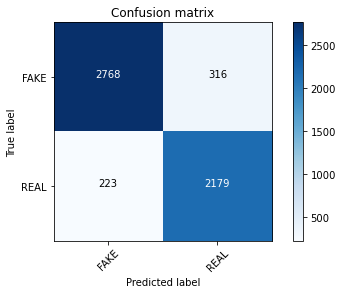

In [51]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [52]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9017499088589136

In [53]:
y_train.shape

(12799,)

### Multinomial Classifier with Hyperparameter

In [58]:
classifier=MultinomialNB(alpha=0.1)

In [59]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8904484141450966
Alpha: 0.1, Score : 0.9030258840685381
Alpha: 0.2, Score : 0.9030258840685381
Alpha: 0.30000000000000004, Score : 0.9026613197229311
Alpha: 0.4, Score : 0.9019321910317171
Alpha: 0.5, Score : 0.9024790375501276
Alpha: 0.6000000000000001, Score : 0.9028436018957346
Alpha: 0.7000000000000001, Score : 0.9035727305869486
Alpha: 0.8, Score : 0.9030258840685381
Alpha: 0.9, Score : 0.9032081662413416


In [60]:
## Get Features names
feature_names = cv.get_feature_names()

In [61]:
classifier.coef_[0]

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([ -9.13851551,  -8.66088795,  -9.13851551, ..., -10.83311123,
        -8.7962293 ,  -9.36677416])

In [62]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.9920894686099926, 'trump'),
 (-4.283778449404154, 'hillari'),
 (-4.375295545839294, 'clinton'),
 (-4.8873997935153906, 'elect'),
 (-5.144630412704637, 'new'),
 (-5.239226293337629, 'comment'),
 (-5.272857037363478, 'video'),
 (-5.400360096919867, 'war'),
 (-5.400360096919867, 'us'),
 (-5.400360096919867, 'hillari clinton'),
 (-5.434948525093684, 'fbi'),
 (-5.450146386003116, 'vote'),
 (-5.535349569997123, 'email'),
 (-5.592540682275724, 'world'),
 (-5.628494225203827, 'obama'),
 (-5.717782305845059, 'donald'),
 (-5.751706861626975, 'donald trump'),
 (-5.7656056260177895, 'russia'),
 (-5.868713801008469, 'day'),
 (-5.868713801008469, 'america')]

In [63]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.833111226611438, 'abe'),
 (-10.833111226611438, 'abroad'),
 (-10.833111226611438, 'abus new'),
 (-10.833111226611438, 'abus new york'),
 (-10.833111226611438, 'act new'),
 (-10.833111226611438, 'act new york'),
 (-10.833111226611438, 'advic'),
 (-10.833111226611438, 'advis new'),
 (-10.833111226611438, 'advis new york'),
 (-10.833111226611438, 'age new'),
 (-10.833111226611438, 'age new york'),
 (-10.833111226611438, 'agenda breitbart'),
 (-10.833111226611438, 'ail'),
 (-10.833111226611438, 'aleppo new'),
 (-10.833111226611438, 'aleppo new york'),
 (-10.833111226611438, 'ali'),
 (-10.833111226611438, 'america breitbart'),
 (-10.833111226611438, 'america new york'),
 (-10.833111226611438, 'american breitbart'),
 (-10.833111226611438, 'american new'),
 (-10.833111226611438, 'american new york'),
 (-10.833111226611438, 'ami'),
 (-10.833111226611438, 'ami schumer'),
 (-10.833111226611438, 'amp'),
 (-10.833111226611438, 'applaud'),
 (-10.833111226611438, 'arson'),
 (-10.83311122661143